In [1]:
library(pheatmap)
library(data.table) 
library(repr)
# Change plot size to 8 x 8
options(repr.plot.width=8, repr.plot.height=8)

## Visualisation of donor matching

In [2]:
# Load correlation matrix
correlation_gx12 <- fread("../data/pipeline_output/gx12/correlation_res.csv")
correlation_gx12 <- as.data.frame(correlation_gx12)
rownames(correlation_gx12) <- correlation_gx12$V1
correlation_gx12 <- correlation_gx12[,-1]
colnames(correlation_gx12) <- gsub("donor", "Donor-", colnames(correlation_gx12))
rownames(correlation_gx12) <- gsub("-TotalSeqA", "", rownames(correlation_gx12))

correlation_gx12

,Donor-0,Donor-1,Donor-2,Donor-3,Donor-4,Donor-5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hash451,-0.2275197,0.74937992,-0.18132714,-0.18549398,-0.09556602,-0.19805405
Hash452,-0.2014033,-0.18286343,-0.11152722,-0.16170086,-0.09407122,0.75006417
Hash453,-0.1924779,-0.06637141,0.55651595,-0.09256307,-0.04810021,-0.14982165
Hash454,0.8930860,-0.25194820,-0.19171140,-0.18771778,-0.12500167,-0.19582197
Hash455,-0.1037505,-0.08837050,-0.01772064,-0.06368348,0.52835531,-0.06691017
Hash456,-0.1832036,-0.19431709,-0.13199943,0.78693512,-0.09013880,-0.14997682


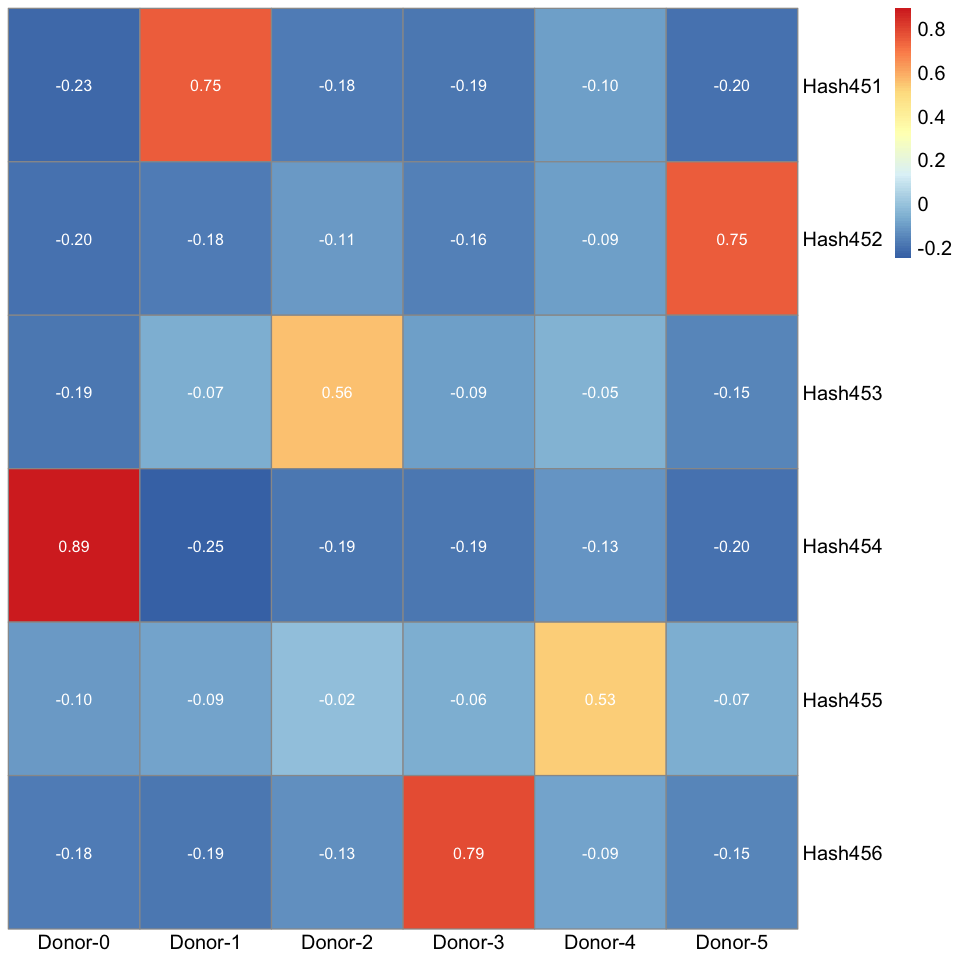

In [3]:
# Define the color palette and the annotation
newCols <- colorRampPalette(grDevices::rainbow(6))
annoCol <- newCols(6)
names(annoCol) <- colnames(correlation_gx12)
annoCol <- list(category = annoCol)

# Sort the axis
correlation_gx12 <- correlation_gx12[order(row.names(correlation_gx12)), ]

# Heatamp
pheatmap(correlation_gx12, treeheight_row=F, treeheight_col=F, display_numbers=T, angle_col="0",
         number_color = "white", fontsize = 12, cluster_rows = F, cluster_cols = F) #, filename="concordance_heatmap_gx12.png", width = 7, height = 5